## Network Science Lab 3

In [1]:
#Run this cell 1st to import numpy, matplotlib, and networkx
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Part 1: Working with weighted directed graphs in NetworkX

In part 1, you will carry out a few simple tasks using a NetworkX weighted directed graph. Run the cell below to generate the graph. Note that we use *nx.DiGraph()* to initialize a directed graph.

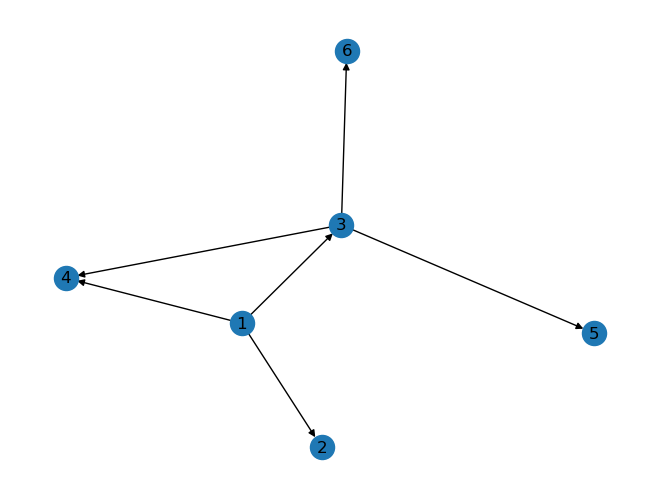

In [2]:
G = nx.DiGraph()

G.add_edge(1, 2, ewt=0.6)
G.add_edge(1, 3, ewt=0.2)
G.add_edge(3, 4, ewt=0.1)
G.add_edge(3, 5, ewt=0.7)
G.add_edge(3, 6, ewt=0.9)
G.add_edge(1, 4, ewt=0.3)

plt.figure()
nx.draw(G,with_labels=True)

The edge weights can be added to the plot, see the example [here](https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html) if you would like to see how.

1) There are many methods and functions in Networkx that have an option to output or to use the edge weights. Read through the documentation for G.edges(), and call it so that it outputs all of the edges and their weights. Use this output to create a 6 x 3 Numpy array where a row contains the two nodes forming an edge and the corresponding edge weight. It may be helpful to first convert the output to a list and then convert the list to an array.
Note that you will have to specify the label for the weights, 'ewt' (see the code used to generate the graph). Print your array and compare it to the code for creating the graph above.

In [9]:
#Add code here

np.array(list(G.edges.data('ewt')))

array([[1. , 2. , 0.6],
       [1. , 3. , 0.2],
       [1. , 4. , 0.3],
       [3. , 4. , 0.1],
       [3. , 5. , 0.7],
       [3. , 6. , 0.9]])

2) NetworkX **does not** use the same convention for adjacency matrices of directed graphs that we have been using. Create the adjacency matrix for the graph above, take the transpose, and verify that the resulting matrix is what you would expect based on our convention.

In [10]:
#Add code here

A = nx.to_numpy_matrix(G)

A.transpose()

matrix([[0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]])

3) Now use nx.adjacency_matrix to create the *weight matrix*, $\rm W$ for the graph. This matrix should store the edge weight for the edge from $j$ to $i$ in $W_{ij}$, and if no such edge exists then $W_{ij}=0$. 

In [16]:
#Add code here

W = nx.to_numpy_array(G, weight = 'ewt')

print(W)

[[0.  0.6 0.2 0.3 0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.7 0.9]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]]


### Part 2: Numerical estimation of the number of triangles in $G_{Np}$ graphs

In lecture 5, we argued that the expected number of triangles in $G_{Np}$ graphs is ${N \choose 3} p^3$. But is this result really correct? We can check it by simulating several $G_{Np}$ graphs and computing the average number of triangles per graph. The first function in the cell below counts the total number of triangles in a NetworkX graph while the second computes the expected number of triangles.

In [20]:
def count_triangles(G):
    """Returns total number of triangles in G
    """
    t = nx.triangles(G)
    return np.sum(list(t.values()))/3

from scipy.special import comb
def expected_triangles(N,p):
    """Expected number of triangles in GNp graph
    """
    return comb(N,3)*p**3

1) Add code to the cell below to simulate 10000 GNp graphs with $N=100$ and $p=0.12$. Store the number of triangles in each graph in a numpy array

In [23]:
#Add code here

lis = []

for r in range(10000):
    lis.append(count_triangles(nx.gnp_random_graph(100, 0.12)))

numtriangles = np.array(lis)
numtriangles

array([268., 272., 306., ..., 332., 262., 292.])

2) Create a numpy array whose ith element contains the average number of triangles in the first i+1 graphs simulated above (here i ranges from 0 to 9999). *np.cumsum* may be helpful for this task.

In [27]:
avg = []

for i in range(9999):
    avg.append(np.sum(numtriangles[0:i+2]) / (i+2))
    
avgtriangles = np.array(avg)

avgtriangles

array([270.        , 282.        , 261.5       , ..., 279.31556311,
       279.31383138, 279.3151    ])

3) Finally, make a plot showing how the average number of triangles varies with the number of graphs used to compute the average. Are the computed averages close to the expected number of triangles?

ValueError: x and y must have same first dimension, but have shapes (10000,) and (999,)

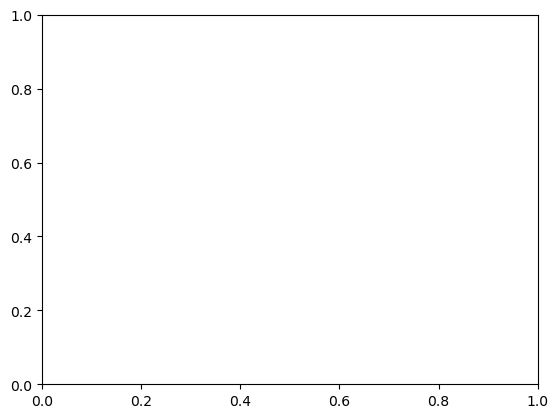

In [34]:
plt.plot([i for i in range(999)], avgtriangles)

In [30]:
lis = []

for r in range(100):
    lis.append(count_triangles(nx.gnp_random_graph(100, 0.12)))

numtriangles = np.array(lis)

avg = []

for i in range(99):
    avg.append(np.sum(numtriangles[0:i+2]) / (i+2))
    
avgtriangles = np.array(avg)

avgtriangles

array([333.        , 342.        , 335.25      , 334.2       ,
       330.33333333, 325.14285714, 313.5       , 302.22222222,
       300.9       , 296.72727273, 297.75      , 296.        ,
       293.64285714, 293.86666667, 293.5       , 292.05882353,
       294.77777778, 291.78947368, 290.95      , 292.9047619 ,
       292.81818182, 292.2173913 , 291.66666667, 291.84      ,
       290.26923077, 291.62962963, 292.64285714, 292.06896552,
       290.96666667, 291.64516129, 290.34375   , 288.87878788,
       287.67647059, 286.31428571, 286.36111111, 287.24324324,
       286.52631579, 286.46153846, 286.05      , 284.97560976,
       283.57142857, 283.39534884, 282.06818182, 282.73333333,
       282.13043478, 282.57446809, 282.1875    , 281.24489796,
       280.92      , 281.58823529, 281.36538462, 282.79245283,
       281.11111111, 280.72727273, 281.08928571, 281.77192982,
       281.81034483, 281.88135593, 281.98333333, 283.70491803,
       284.27419355, 283.77777778, 286.03125   , 285.84

In [31]:
lis = []

for r in range(1000):
    lis.append(count_triangles(nx.gnp_random_graph(100, 0.12)))

numtriangles = np.array(lis)

avg = []

for i in range(999):
    avg.append(np.sum(numtriangles[0:i+2]) / (i+2))
    
avgtriangles = np.array(avg)

avgtriangles

array([259.5       , 272.33333333, 263.        , 264.2       ,
       273.33333333, 274.14285714, 274.        , 277.22222222,
       279.7       , 282.54545455, 284.58333333, 285.30769231,
       283.5       , 281.06666667, 282.8125    , 278.23529412,
       279.94444444, 277.10526316, 276.35      , 276.42857143,
       276.36363636, 275.47826087, 273.20833333, 272.12      ,
       273.15384615, 272.59259259, 272.21428571, 275.17241379,
       275.6       , 275.09677419, 277.65625   , 278.27272727,
       278.05882353, 278.62857143, 279.47222222, 278.18918919,
       278.47368421, 279.56410256, 279.65      , 279.2195122 ,
       279.19047619, 279.65116279, 281.47727273, 281.4       ,
       281.06521739, 282.23404255, 281.14583333, 281.51020408,
       280.5       , 280.66666667, 280.78846154, 281.9245283 ,
       281.92592593, 282.32727273, 282.66071429, 283.07017544,
       282.67241379, 281.6779661 , 281.55      , 281.55737705,
       281.74193548, 282.0952381 , 282.078125  , 281.86